In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose

# DAILY TOTAL FEMALE BIRTH DATASET

In [6]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df=pd.read_csv(url, parse_dates=['Date'],index_col='Date')
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


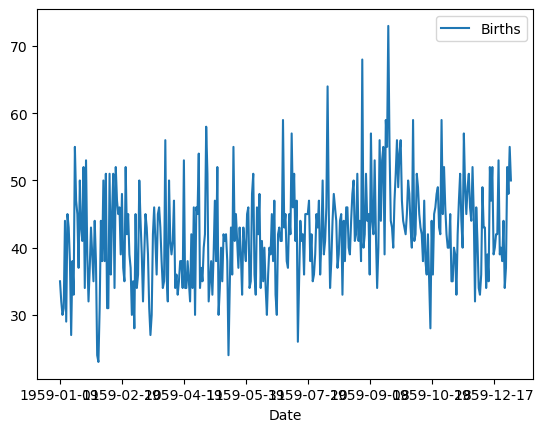

In [8]:
series=pd.read_csv(url,header=0,index_col=0)
series.plot()
plt.show()

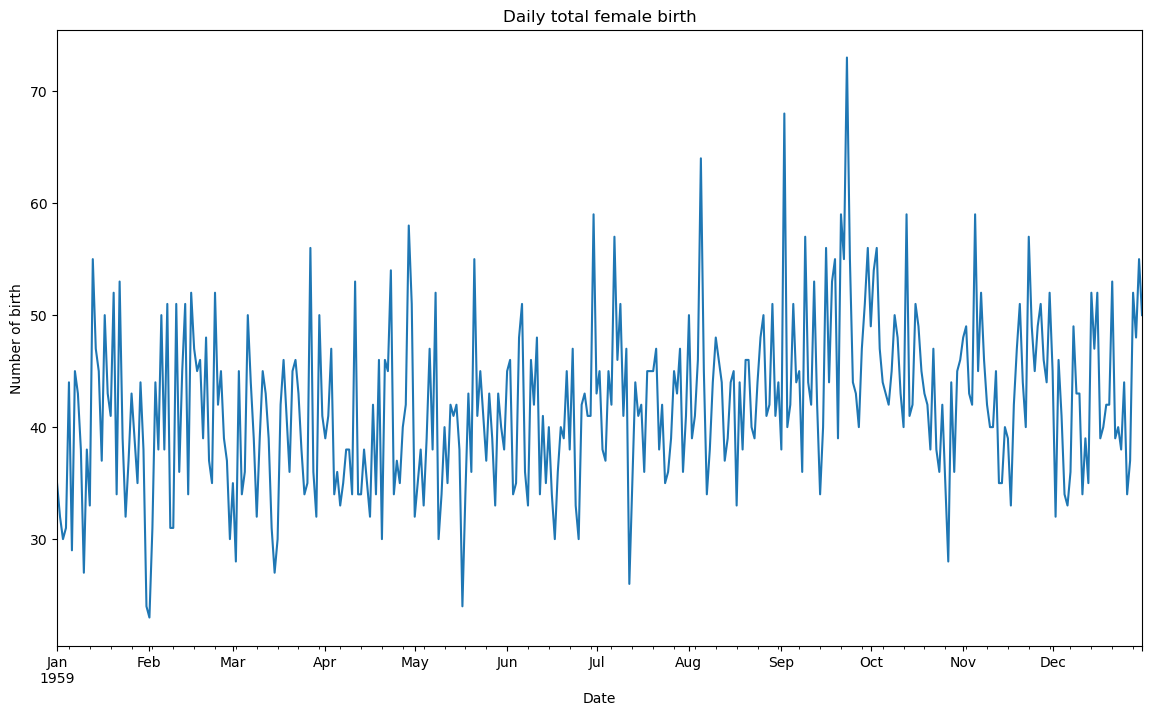

In [10]:
df.plot(title="Daily total female birth",figsize=(14,8),legend=None)
plt.xlabel('Date')
plt.ylabel('Number of birth')
plt.show()

In [15]:
def kpss_test(series):
    statistic,p_val,n_lag,critical_val=kpss(series)
    print(f'KPSS Statistic: {statistic:.4f}')
    print(f'P-value: {p_val:.4f}')
    print(f'Number of lags: {n_lag}')
    print('Critical values: ')
    for k,v in critical_val.items():
        print(f' {k}: {v:.4f}')
    print(f'Result: The series is {"not " if p_val < 0.05 else ""}stationary')
kpss_test(df['Births'])

KPSS Statistic: 1.6130
P-value: 0.0100
Number of lags: 7
Critical values: 
 10%: 0.3470
 5%: 0.4630
 2.5%: 0.5740
 1%: 0.7390
Result: The series is not stationary


C:\Users\lab4user\AppData\Local\Temp\ipykernel_4492\2523306899.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic,p_val,n_lag,critical_val=kpss(series)


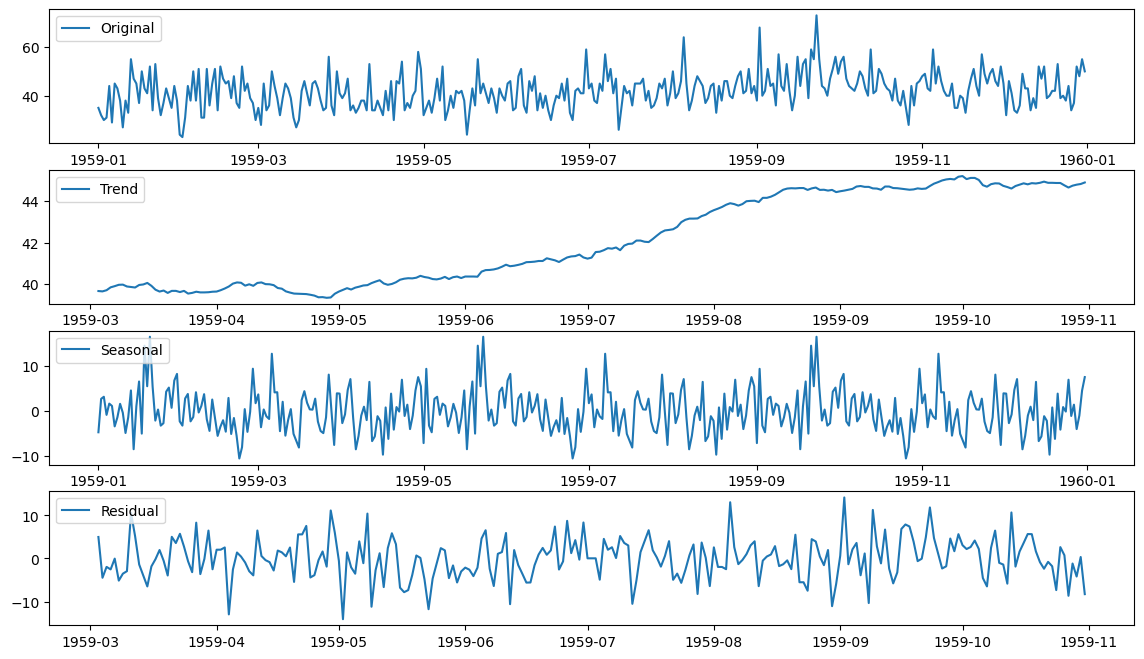

In [20]:
decompose=seasonal_decompose(df['Births'],model='additive',period=123)
trend=decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid

plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(df['Births'],label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='upper left')
plt.show()

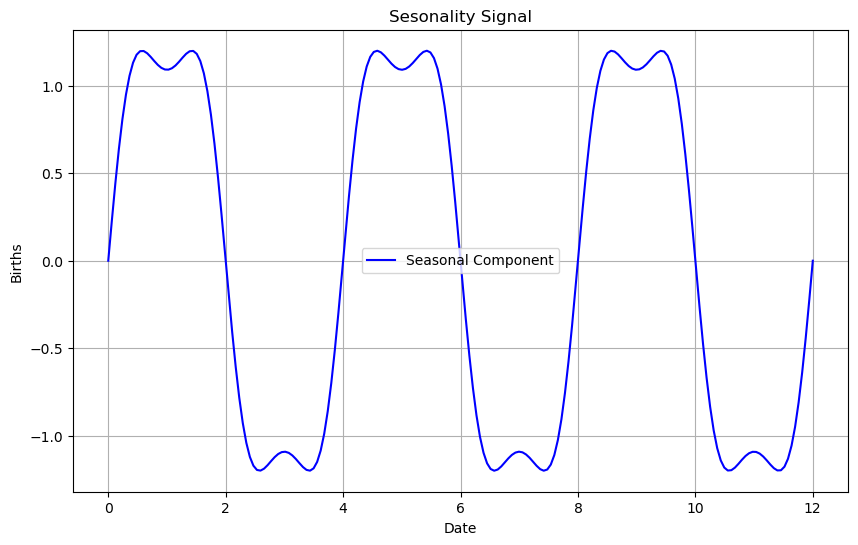

In [23]:
x_axis=np.linspace(0,12,num=200)
seasonality=1.2*np.sin(2*np.sin(2*np.pi*x_axis/4))
plt.figure(figsize=(10,6))
plt.plot(x_axis, seasonality,label="Seasonal Component",color='b')
plt.xlabel("Date")
plt.ylabel("Births")
plt.title("Sesonality Signal")
plt.grid(True)
plt.legend()
plt.show()

# DAILY MIN TEMPERATURE DATASET